In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

* Country - Name of the country.
* happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10
* gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.
* family - The extent to which Family contributes to the calculation of the Happiness Score
* health - The extent to which Life expectancy contributed to the calculation of the Happiness Score
* freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
* generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.
* government_trust - The extent to which Perception of Corruption contributes to Happiness Score.
* dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.
* continent - Region of the country.

* Country – Название страны.
* happiness_score — среднее значение ответов на основной вопрос об оценке жизни из опроса Gallup World Poll (GWP). 0-10
* gdp_per_capita — степень, в которой ВВП участвует в расчете показателя счастья.
* family – степень, в которой семья участвует в расчете показателя счастья.
* health - степень, в которой ожидаемая продолжительность жизни способствовала расчету показателя счастья.
* freedom – степень, в которой свобода способствовала расчету показателя счастья.
* generosity — числовое значение, рассчитанное на основе восприятия участниками опроса щедрости в их стране.
* Government_trust — степень, в которой восприятие коррупции влияет на показатель счастья.
* Dystopia_residual — оценка, основанная на гипотетическом сравнении с самой печальной страной в мире.
* continent – регион страны.

In [2]:
df = pd.read_csv('/Users/shu/netology/files_from_netology/Notebook_dz_corr_and_regression/happines_corruption.csv')


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


### Задание 1

Базово изучите датасет (достаточно методов info() и describe()).

Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.

Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [6]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [7]:
df.shape

(792, 13)

<Axes: >

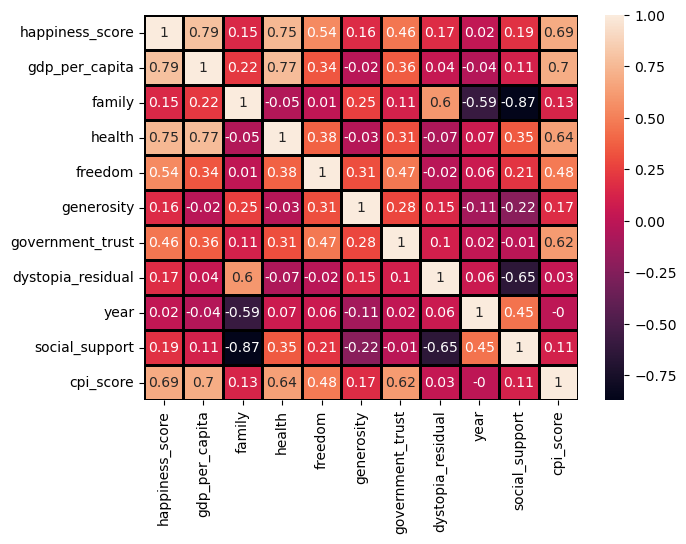

In [8]:
# Визуализируем зависимые данные в датасете с помощью Тепловая карта

plt.figure(figsize=(7,5))
sns.heatmap(df[df.describe().columns].corr().round(2), annot=True, linecolor='black', linewidths=1)

In [9]:
df.happiness_score.corr(df.gdp_per_capita)

0.7932671770333463

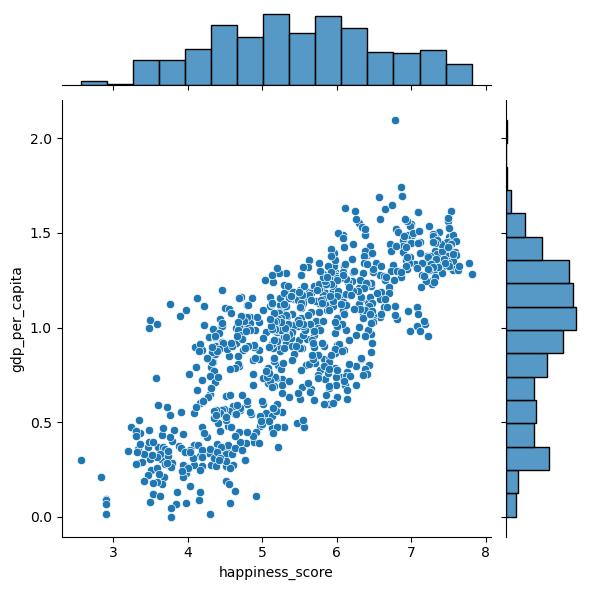

In [10]:
# Есть сильная зависимость между уровнем счастья и ВВП. 
# Утверждение, что чем выше ВВП, тем выше и уровень счастья, верно

sns.jointplot(x=df.happiness_score, y=df.gdp_per_capita, data=df)

In [11]:
# Есть средняя зависимость между уровнем счастья и Гос доверием. 

df.happiness_score.corr(df.government_trust)

0.455477467709318

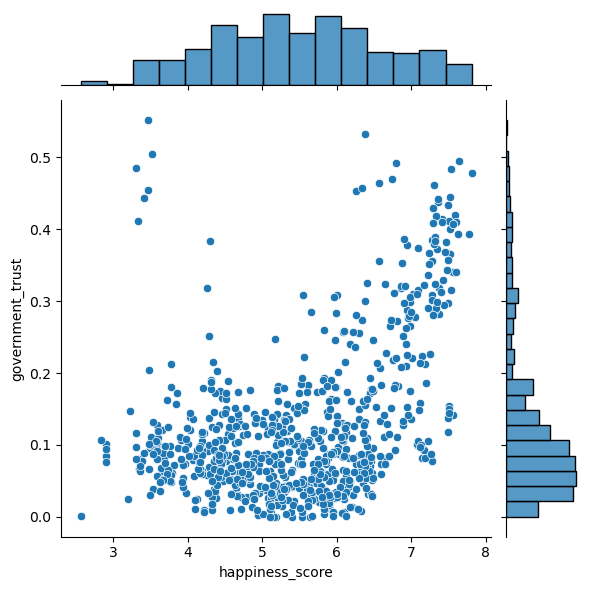

In [12]:
# Утверждение Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?, взаимосвязь есть, но
# не сильная. У Большенства людей, доверие правительству, не оказывает сильное влияние на уровень счастья


sns.jointplot(x='happiness_score', y='government_trust', data=df)

### Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

* Оставьте только два столбца:'Temperature' и 'Sum'.
* Постройте диаграмму рассеяния.
* Постройте модель линейной регрессии для выбранных признаков.
* Рассчитайте точность модели на тестовой выборке.
* Выведите график остатков.

In [13]:
df_gas = pd.read_csv('/Users/shu/netology/files_from_netology/Notebook_dz_corr_and_regression/gas_sales_data.csv')

In [14]:
df_gas.columns = df_gas.columns.str.lower()

In [15]:
df_gas.head()

,year,month,temperature,gangwondo,seoul,gyeonggido,incheon,gyeongsangnamdo,gyeongsangbukdo,gwangju,...,daejeon,busan,sejong,ulsan,jeollanamdo,jeollabukdo,jeju,chungcheongnamdo,chungcheongbukdo,sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [16]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              252 non-null    int64  
 1   month             252 non-null    int64  
 2   temperature       252 non-null    float64
 3   gangwondo         252 non-null    int64  
 4   seoul             252 non-null    int64  
 5   gyeonggido        252 non-null    int64  
 6   incheon           252 non-null    int64  
 7   gyeongsangnamdo   252 non-null    int64  
 8   gyeongsangbukdo   252 non-null    int64  
 9   gwangju           252 non-null    int64  
 10  daegu             252 non-null    int64  
 11  daejeon           252 non-null    int64  
 12  busan             252 non-null    int64  
 13  sejong            252 non-null    int64  
 14  ulsan             252 non-null    int64  
 15  jeollanamdo       252 non-null    int64  
 16  jeollabukdo       252 non-null    int64  
 1

In [17]:
df_gas.describe()

,year,month,temperature,gangwondo,seoul,gyeonggido,incheon,gyeongsangnamdo,gyeongsangbukdo,gwangju,...,daejeon,busan,sejong,ulsan,jeollanamdo,jeollabukdo,jeju,chungcheongnamdo,chungcheongbukdo,sum
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,2010.000000,6.500000,13.367381,21187.654762,381844.194444,364211.321429,116839.166667,69503.865079,91440.480159,42210.015873,...,49795.369048,96483.678571,2723.710317,139338.325397,36998.813492,52306.031746,813.273810,84594.964286,44715.392857,1.666574e+06
std,6.067351,3.458922,9.540984,13849.668618,229323.680039,187675.176062,50204.769577,32343.651403,38831.743548,21646.078300,...,28359.574096,42725.971341,3765.498664,73185.024161,19424.570354,27625.166518,862.904837,47284.620633,25855.175390,7.965762e+05
min,2000.000000,1.000000,-5.740000,2800.000000,108894.000000,91000.000000,32372.000000,16218.000000,25449.000000,9781.000000,...,10624.000000,32947.000000,0.000000,36183.000000,9425.000000,9939.000000,0.000000,11354.000000,8574.000000,4.513220e+05
25%,2005.000000,3.750000,4.657500,11510.000000,173070.000000,223853.250000,73866.000000,45920.000000,59444.000000,26853.250000,...,27491.000000,65521.000000,0.000000,77515.750000,22325.000000,31468.250000,42.500000,47004.750000,24145.750000,1.094284e+06
50%,2010.000000,6.500000,14.315000,17421.000000,305387.000000,310090.000000,104425.500000,62439.000000,87222.500000,35050.000000,...,39853.000000,82972.000000,0.000000,121286.000000,33244.500000,47774.000000,612.500000,81050.500000,41661.000000,1.436072e+06
75%,2015.000000,9.250000,22.260000,27480.250000,595902.250000,500968.000000,161016.250000,90403.750000,113427.750000,57097.750000,...,70956.000000,121199.000000,5519.500000,198185.000000,48067.500000,67823.250000,1208.500000,111837.750000,58396.750000,2.226306e+06
max,2020.000000,12.000000,28.560000,64248.000000,928709.000000,859780.000000,241088.000000,157687.000000,192264.000000,99162.000000,...,123727.000000,215573.000000,12855.000000,352116.000000,97863.000000,125735.000000,4220.000000,198939.000000,119471.000000,3.748910e+06


In [18]:
df_gas_2 = df_gas[['temperature','sum']]

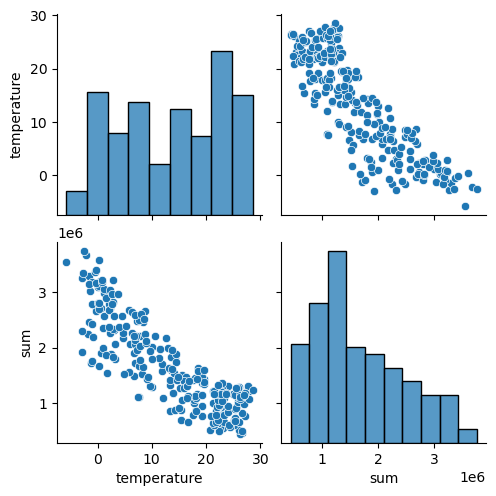

In [19]:
sns.pairplot(df_gas_2)

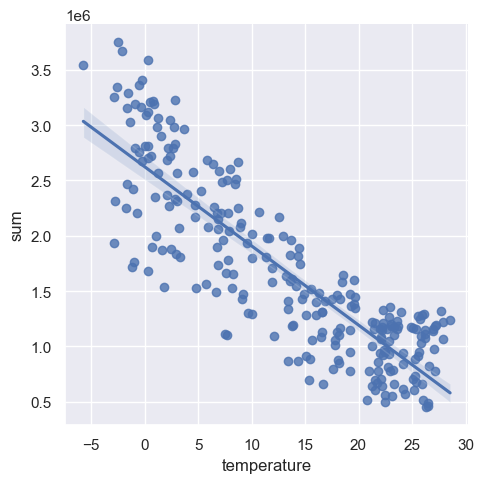

In [20]:
sns.set(color_codes=True)
sns.lmplot(x='temperature', y='sum', data=df_gas_2)

In [21]:
X = df_gas_2[['sum']]

In [22]:
y = df_gas_2.temperature

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
lm.coef_

array([-1.034534e-05])

In [27]:
lm.intercept_

30.383285164813955

In [28]:
# y = lm.coef_ * x + lm.intercept_
# y = -1.0345340012517905e-05 * x + 30.38
# x =  X_test.iloc[0:1].sum() - первый элемент в списке
    
lm.coef_ * X_test.iloc[0:1].sum() + lm.intercept_

sum    15.071137
dtype: float64

In [29]:
predictions = lm.predict(X_test)

Построим точечный график фактических значений относительно прогнозных

Text(0.5, 0, 'Факт')

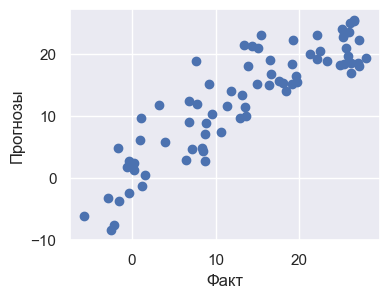

In [30]:
plt.figure(figsize=(4,3))
plt.scatter(y_test, predictions)
plt.ylabel('Прогнозы')
plt.xlabel('Факт')

In [31]:
# Рассчитываем точность модели на тестовой выборке разными методами


import sklearn.metrics as metrics

print(f'R2: {metrics.r2_score(y_test, predictions)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

R2: 0.77745585474441
MAE: 3.7022950612807253
MSE: 20.813103280872486
RMSE: 4.562138016420863


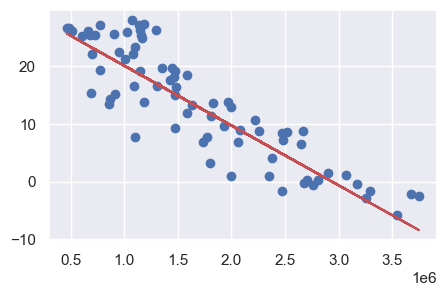

In [32]:
# Смотрим на точность модели

plt.figure(figsize=(5,3))
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, c='r')

Посмотрим ещё на остатки

<Axes: xlabel='temperature', ylabel='Count'>

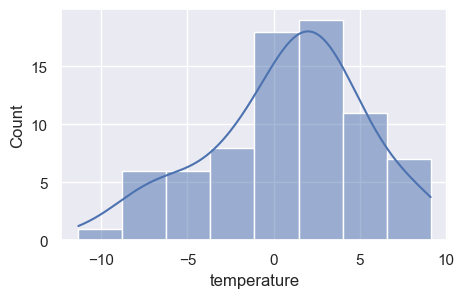

In [33]:
# График с остатками

plt.figure(figsize=(5,3))
sns.histplot((y_test-predictions), kde=True)

In [34]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Коэффициенты'])

,Коэффициенты
sum,-0.00001
